<a href="https://colab.research.google.com/github/mynameis-sohee/Customer-Gender-Prediction/blob/main/02_%5B%EC%A0%84%EC%B2%98%EB%A6%AC(1)%5D_Data_Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EDA를 간단히 정리한 결과는 다음과 같습니다.
 
 &nbsp;

  <head>
    <title>EDA 결과 정리</title>
    <style>
      table, th, td {
        border: 2px solid #bcbcbc;
      }
    </style>
  </head>
  <body>
    <table>
      <thead>
        <tr>
          <th class="jb-th-1">Features</th>
          <th>설명</th>
        </tr>
      </thead>
      <tbody>
<tr>
    <td>Unnamed: 0_x,Unnamed: 0_y </td> <td>인덱스 구분값이므로, 삭제</td>
  </tr>
  <tr>
    <td>Invoice ID</td> <td>구매이력을 구분하기 위해 존재하는 것이므로, 삭제</td>
  </tr>
  <tr>
    <td>Branch, City</td> <td>상관계수 1, 서로의 Features를 100% 설명 가능하므로 둘 중 하나의 Columns는 삭제</td> 
  </tr>
    <tr>
    <td>Customer type</td> <td>남성:비회원,여성:회원인 경우가 많고, 평균적으로는 남성의 구매 빈도가 근소하게 높음</td>
  </tr>
    <tr>
    <td>Unit price</td> <td>남성이 조금 더 높으나 통계적으로 유의미한 차이는 아니며, 이상치 제거의 영향이 크지 않으므로 이상치 제거 않고 진행</td>
  </tr>
    <tr>
    <td>Quantity</td> <td>어느정도 편차가 존재. 지불총액과 구매수량은 상관관계가 높음. 여성의 평균 구매수량이 통계적으로 유의미하게 많음.</td>
  </tr>
      <tr>
    <td>Tax 5%, Total, cogs, gross income</td> <td>상관계수 1, 서로의 Features를 100% 설명 가능하므로 한 colum 제외 나머지 삭제</td>
  </tr>
      <tr>
    <td>Date</td> <td>날짜 데이터 통해 'Weekday' Feature 생성 </td>
  </tr>
  <tr>
    <td>Time</td> <td>시간대별 방문자 수와 전체 매출은 어느정도 비례. 한 건당 평균 매출은 대체적으로 일정하게 분포. 시간대에 따른 매출규모 차이: 어느정도 편차 존재하나, 통계적으로 유의미한 차이는 아님.
</td>
  </tr>
  <tr>
    <td>Payment</td> <td>성별에 따른 지불방법 별 매출액 차이는 어느정도 존재하나, 통계적으로 유의미한 차이는 아님</td>
  </tr>
  <tr>
    <td>gross margin percentage
    </td> <td>단일값이므로 삭제</td>
  </tr>
    <tr>
    <td>Rating</td> <td>남성이 조금 더 높으나 통계적으로 유의미한 차이는 아니며, 이상치 제거의 영향이 크지 않으므로 이상치 제거 않고 진행</td>
  </tr>
      </tbody>
    </table>
  </body>
</html>

 &nbsp;

-----


 &nbsp;


&nbsp;

&nbsp;


#### 해당 정보를 바탕으로, 간단한 전처리를 진행할 예정입니다.
#### 2차 전처리는 모델링 단계에서 진행할 것입니다.

## **전처리 함수 생성**

### Unnamed: 0

In [ ]:
# 'Unnamed: 0' Features 를 제거하는 함수 생성합니다.
def drop_unnamed(df):
  df = df.drop(['Unnamed: 0'],axis=1, inplace=True)

### Invoice ID

In [ ]:
# 'Invoice ID' Features 를 제거하는 함수 생성합니다.
def drop_inv(df):
  df = df.drop(['Invoice ID'],axis=1, inplace=True)

### Branch, City

In [ ]:
# City 삭제하는 함수 생성합니다.
def drop_city(df):
  df = df.drop(['City'],axis=1, inplace=True)

### Tax 5%, Total, cogs, gross income

In [ ]:
# 'Total' Feature 제외하고 나머지 Features 삭제하는 함수 생성합니다.

def drop_count(df):
  df = df.drop(['Tax 5%', 'cogs', 'gross income'],axis=1,inplace=True)

### Date

In [ ]:
# 'Weekday' Feature를 생성하는 함수 생성합니다.

def make_weekday(df):
  df['Date'], df['Weekday'] = pd.to_datetime(df['Date']), 0
  for i in range(0,len(df)):
    df['Weekday'][i]=datetime.date(pd.to_numeric(df['Date'].astype('string').str.split('-').str[0][i]), pd.to_numeric(df['Date'].astype('string').str.split('-').str[1][i]), pd.to_numeric(df['Date'].astype('string').str.split('-').str[2][i])).weekday()
  df=df.replace({'Weekday':{0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}}, inplace=True)

In [ ]:
# 해당 분석에는 시계열을 진행하지 않을 예정이므로, 'Date' 함수 제거합니다.

def drop_day(df):
  df = df.drop(['Date'],axis=1,inplace=True)

### Time

In [ ]:
# 시간 값을 계산하기 용이하도록 분 단위를 반올림하여, 시 단위로 변경해 카테고리화/수치형으로 변환하는 함수를 만듭니다.

def categorization_time(df):
  for i in range(0,len(df)):
    if pd.to_numeric(df['Time'].str.split(':').str[1][i])>=30: a = pd.to_numeric(df['Time'].str.split(':').str[0][i])+1
    else: a = df['Time'].str.split(':').str[0][i]
    df['Time'][i]= a
  
  df['Time']=df['Time'].astype('int')

### gross margin percentage

In [ ]:
# gross margin percentage 삭제하는 함수 생성합니다.

def drop_gmp(df):
  df.drop('gross margin percentage', axis=1,inplace=True)

#### 1차 Preprocessing - 위에서 만든 함수를 X_train, X_test에 적용합니다.

In [ ]:
# 위에서 만든 모든 함수를 한 번에 적용할 수 있는 통합 함수를 만듭니다.

def preprocessing_1(df):
  drop_unnamed(df)
  drop_inv(df)
  drop_city(df)
  drop_count(df)
  make_weekday(df)
  drop_day(df)
  categorization_time(df)
  drop_gmp(df)

# X_train, X_test에 적용합니다.

preprocessing_1(X_train)
preprocessing_1(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# 1차 전처리가 잘 진행되었는지 확인합니다. (X_train)
X_train.head(2)

,Branch,Customer type,Product line,Unit price,Quantity,Total,Time,Payment,Rating,Weekday
0,C,Member,Health and beauty,21.12,2,44.352,19,Cash,9.7,thu
1,B,Normal,Sports and travel,93.31,2,195.951,18,Cash,6.3,mon


In [ ]:
# 1차 전처리가 잘 진행되었는지 확인합니다. (X_test)
X_test.head(2)

,Branch,Customer type,Product line,Unit price,Quantity,Total,Time,Payment,Rating,Weekday
0,C,Member,Fashion accessories,73.38,7,539.343,14,Cash,9.5,sun
1,C,Normal,Food and beverages,16.48,6,103.824,18,Ewallet,9.9,thu


#### 2차 Preprocessing - 인코딩을 진행하고, Validation 데이터셋을 만듭니다.



In [ ]:
# 인코딩을 진행합니다.

# Customer type,Time, Payment One-Hot Encoding
train_num = len(X_train)
X = pd.concat([X_train, X_test], axis=0)
X = pd.get_dummies(X)
X_train,X_test = X[:train_num], X[train_num:]

In [ ]:
# y_train , y_test 데이터를 살펴봅니다.

print('y_train의 카테고리 수: ',y_train.nunique())
print('\ny_test의 카테고리 수: ',y_test.nunique())


# Target - Label Encoding
drop_unnamed(y_train) # 인덱스 Feature 삭제
drop_unnamed(y_test) # 인덱스 Feature 삭제

lb=LabelEncoder()
y_train, y_test = lb.fit_transform(y_train), lb.transform(y_test)

y_train의 카테고리 수:  Unnamed: 0    800
Gender          2
dtype: int64

y_test의 카테고리 수:  Unnamed: 0    200
Gender          2
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(len(y_test))
print(len(y_train))

200
800


In [ ]:
# Train 데이터를 Validation(X_val,y_val) 데이터와 Train(X_train, y_train) 데이터로 분리합니다. Validation Set을 형성해, 추후 모델 학습 시 활용할 예정입니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
for i in X_train, X_val : i=i.reset_index(drop=True, inplace=True)

In [ ]:
# 잘 분포되었는지 확인해봅니다.
print('X_train 길이: ',len(X_train),'\nX_val 길이: ',len(X_val),'\nX_test 길이: ',len(X_test))

X_train 길이:  640 
X_val 길이:  160 
X_test 길이:  200


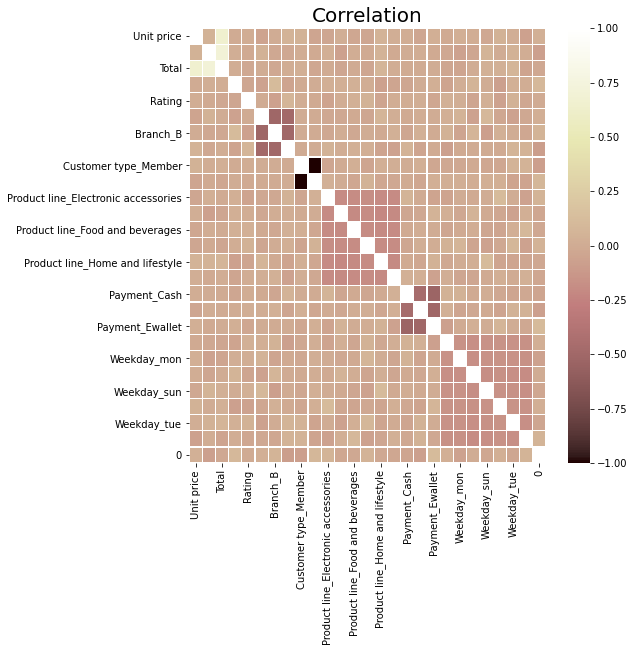

In [ ]:
# train 데이터의 상관계수 분포도를 확인해보고, 1차 전처리를 마무리합니다.
train = pd.merge(X_train,pd.DataFrame(y_train),right_index=True,left_index=True)
sns.heatmap(train.corr(),cmap='pink',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Correlation',fontsize=20)
plt.show()

&nbsp;

&nbsp;

&nbsp;
&nbsp;

---

#### **이로써, 간단한 전처리 작업이 종료되었습니다.**
### Feature Engineering(축소 등) 등의 **3차 전처리**는 **모델링 단계**에서 진행할 것이며, 모델 성능을 높일 예정입니다.


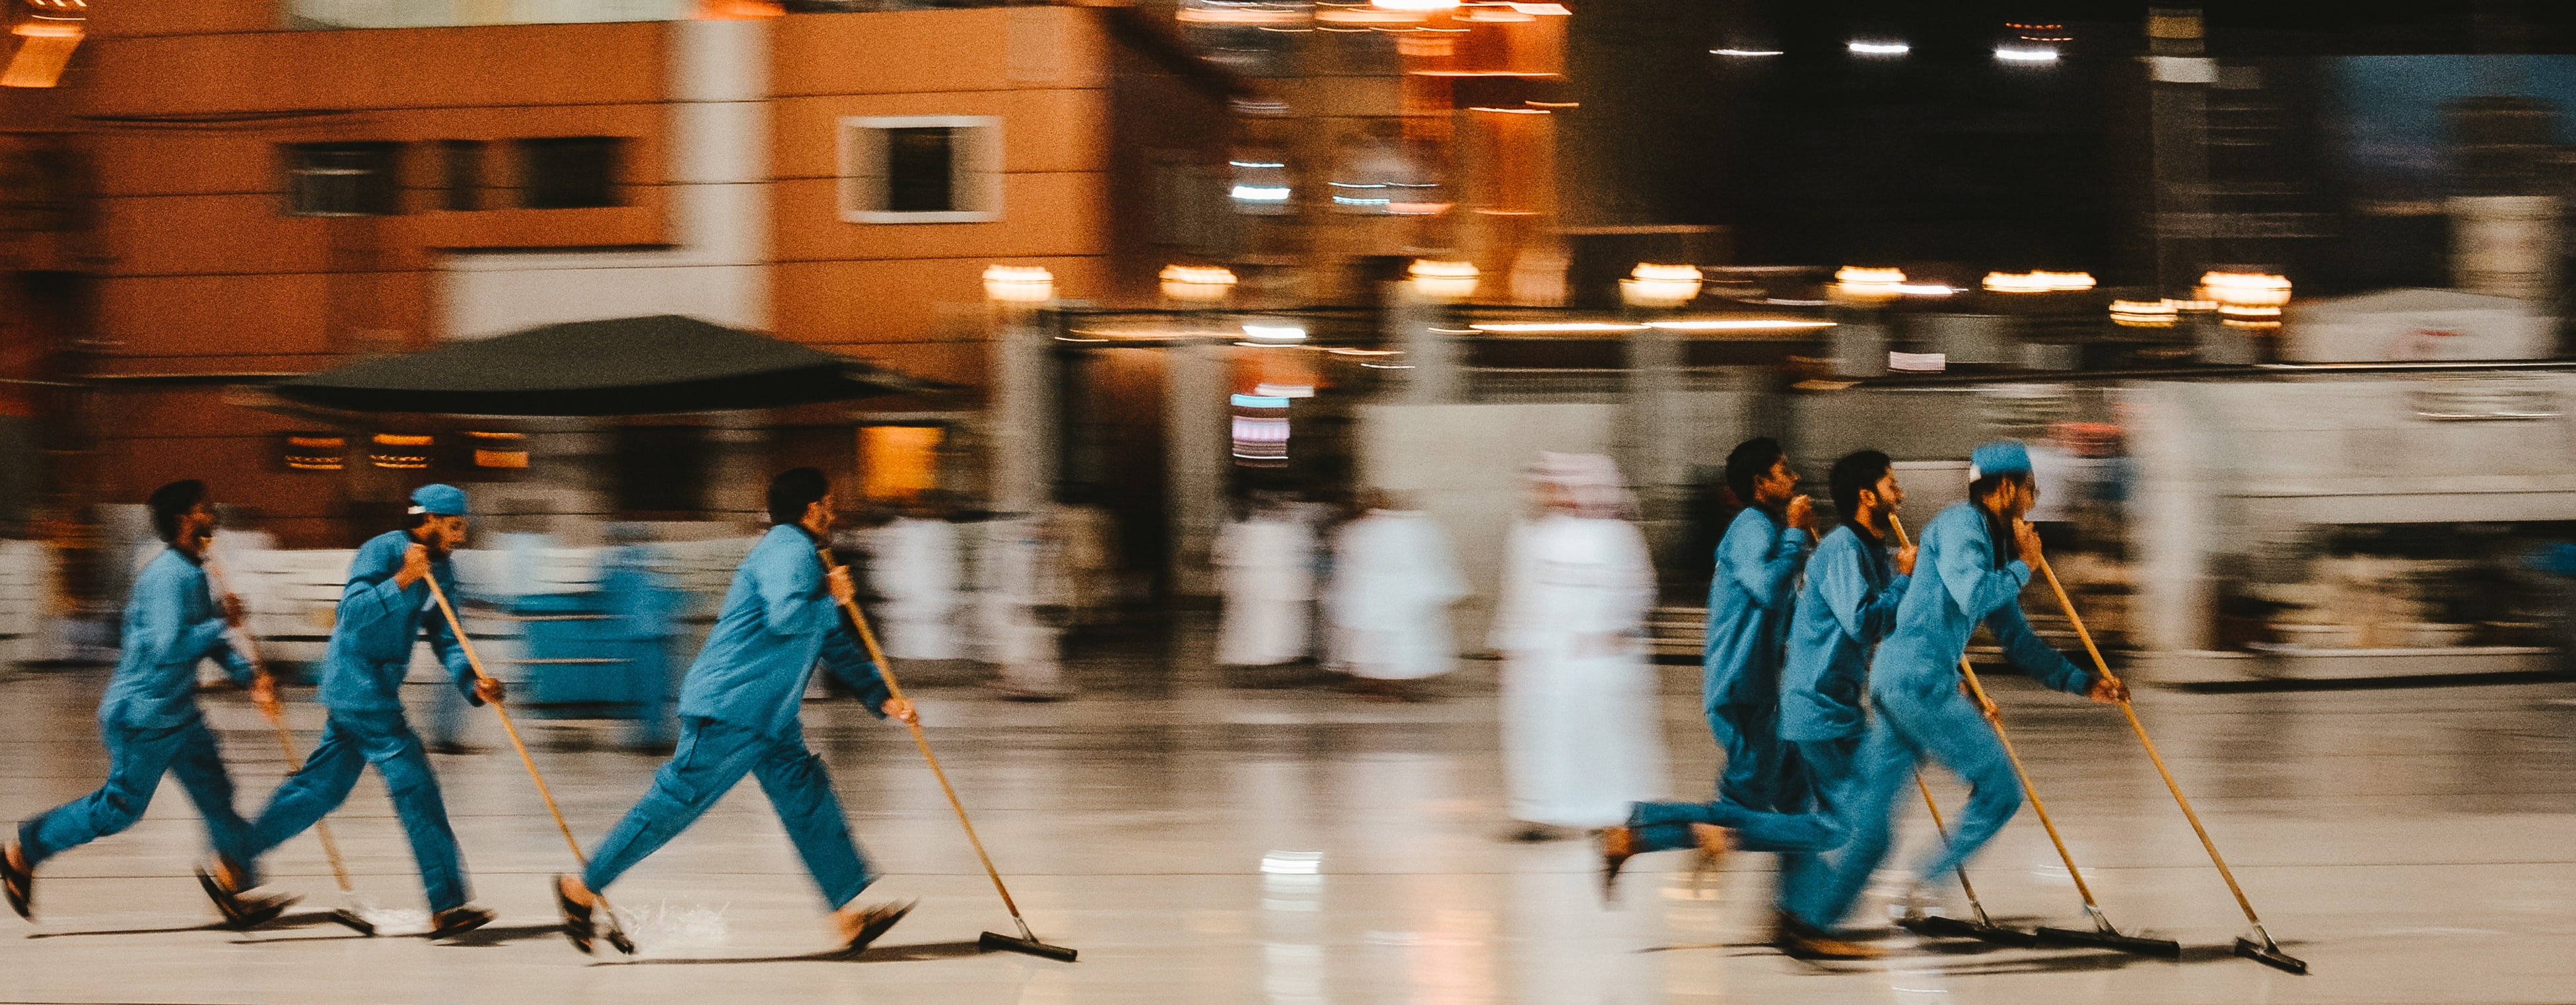